# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# Your code here
import pandas as pd
customer_data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
customer_data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
customer_data.rename(columns = {'Customer':'customer_id','ST':'state'}, inplace = True) 
customer_data.columns = customer_data.columns.str.lower().str.strip()
customer_data.columns = customer_data.columns.str.replace(" ","_").str.strip()
customer_data.head()

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [3]:
customer_data.dropna(axis=0, how = 'all',inplace=True)

In [4]:
#Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Your code here
for cols in customer_data.columns:
    if customer_data[cols].nunique() < 10:
        unique_Of_each = customer_data[cols].unique()
        print(f"Uniques values of {cols} column is : {unique_Of_each}")

Uniques values of state column is : ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA']
Uniques values of gender column is : [nan 'F' 'M' 'Femal' 'Male' 'female']
Uniques values of education column is : ['Master' 'Bachelor' 'High School or Below' 'College' 'Bachelors' 'Doctor']
Uniques values of number_of_open_complaints column is : ['1/0/00' '1/2/00' '1/1/00' '1/3/00' '1/5/00' '1/4/00']
Uniques values of policy_type column is : ['Personal Auto' 'Corporate Auto' 'Special Auto']
Uniques values of vehicle_class column is : ['Four-Door Car' 'Two-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']


In [6]:
# def upper_case(el):
#     return el.upper()
def mod_upper(q):
    if isinstance(q,str):
        return q.upper()
    else:
        return q
def clean(x):
    if str(x) in ['M', 'MALE']:
        return 'M'
    elif str(x).startswith('F'):
        return 'F'
customer_data['gender'] =list(map(mod_upper,customer_data['gender']))
customer_data['gender'] = list(map(clean, customer_data['gender']))
customer_data['gender'].unique()

array([None, 'F', 'M'], dtype=object)

In [7]:
#"AZ": "Arizona", "Cali": "California", "WA": "Washington"
display(customer_data['state'].unique())
def switch(st):
    if st == "AZ":
        return "Arizona"
    elif st == "Cali":
        return "California"
    elif st == "WA":
        return "Washington"
    else:
        return st
 
customer_data['state'] = list(map(switch,customer_data['state']))
customer_data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA'], dtype=object)

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [8]:
#In education, "Bachelors" could be replaced by "Bachelor"
customer_data['education'] = list(map(lambda ed : str(ed).replace("Bachelors","Bachelor"),customer_data['education']))
customer_data['education'].value_counts()

education
Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: count, dtype: int64

In [9]:
#In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
#customer_data['vehicle_class'] = list(map(lambda ed : str(ed).replace("Bachelors","Bachelor"),customer_data['vehicle_class']))
def switch1(vh):
    if vh in ["Sports Car","Luxury SUV","Luxury Car"]:
        return "Luxury"
    else:
        return vh
customer_data['vehicle_class'] = list(map(switch1,customer_data['vehicle_class']))
customer_data['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [10]:
# Your code here
customer_data['customer_lifetime_value'].value_counts(dropna=False)
customer_data['customer_lifetime_value'] = customer_data['customer_lifetime_value'].fillna("0")
customer_data['customer_lifetime_value'] = list(map(lambda x : x.replace("%", " "),customer_data['customer_lifetime_value']))
customer_data['customer_lifetime_value'] = customer_data['customer_lifetime_value'].astype(float)
customer_data['customer_lifetime_value']

0             0.00
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
1066     305955.03
1067    2031499.76
1068     323912.47
1069     462680.11
1070     899704.02
Name: customer_lifetime_value, Length: 1071, dtype: float64

In [11]:
display(customer_data['number_of_open_complaints'].value_counts(dropna = False))
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'].fillna('0/0')
customer_data['number_of_open_complaints'] = list(map(lambda y : y.split('/')[1],customer_data['number_of_open_complaints'] ))
customer_data['number_of_open_complaints'] = customer_data['number_of_open_complaints'].astype(int)
customer_data['number_of_open_complaints'] 

number_of_open_complaints
1/0/00    830
1/1/00    138
1/2/00     50
1/3/00     34
1/4/00     13
1/5/00      6
Name: count, dtype: int64

0       0
1       0
2       0
3       0
4       0
       ..
1066    1
1067    2
1068    0
1069    0
1070    0
Name: number_of_open_complaints, Length: 1071, dtype: int32

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [12]:
customer_data

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,None,Master,0.00,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,Oregon,M,Master,305955.03,38644.0,78.0,1,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0,Special Auto,SUV,547.200000


In [13]:
customer_data.isnull().sum()

customer_id                    0
state                          0
gender                       117
education                      0
customer_lifetime_value        0
income                         0
monthly_premium_auto           0
number_of_open_complaints      0
policy_type                    0
vehicle_class                  0
total_claim_amount             0
dtype: int64

In [14]:
customer_data['gender'].value_counts(dropna=False)
customer_data['gender'] = list(map(lambda g : str(g).replace("None","U"),customer_data['gender']))

In [15]:
customer_data['gender'].value_counts(dropna = False)

gender
F    502
M    452
U    117
Name: count, dtype: int64

In [16]:
customer_data.isnull().sum()

customer_id                  0
state                        0
gender                       0
education                    0
customer_lifetime_value      0
income                       0
monthly_premium_auto         0
number_of_open_complaints    0
policy_type                  0
vehicle_class                0
total_claim_amount           0
dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [22]:
# Your code here
customer_data.to_csv('clean_customer_data_ver0.csv',index=False)
#donors.to_csv('merged_clean_ver0.csv', index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [18]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [17]:
# Your code here

# -----------------------------------------------------------------------------------------

# customer-analysis-round-3-eda-using-graphs

* Show DataFrame info.
* Describe DataFrame.
* Show a plot of the Gender breakdown.
* Show a plot of Income by State.
* Show a plot of the Policy Type by the Total Claim Amount.
* Show a plot of the Education by Vehicle Class.
* What insights can you establish from these plots?
* What other plots do you feel would be beneficial?

In [18]:
# Show DataFrame info.
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                1071 non-null   object 
 1   state                      1071 non-null   object 
 2   gender                     1071 non-null   object 
 3   education                  1071 non-null   object 
 4   customer_lifetime_value    1071 non-null   float64
 5   income                     1071 non-null   float64
 6   monthly_premium_auto       1071 non-null   float64
 7   number_of_open_complaints  1071 non-null   int32  
 8   policy_type                1071 non-null   object 
 9   vehicle_class              1071 non-null   object 
 10  total_claim_amount         1071 non-null   float64
dtypes: float64(4), int32(1), object(6)
memory usage: 96.2+ KB


In [21]:
# Describe DataFrame.
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,791467.037330,643944.708436,0.000000,401975.275000,584932.150000,894520.995,5.816655e+06
income,1071.0,39295.701214,30469.427060,0.000000,14072.000000,36234.000000,64631.000,9.996000e+04
monthly_premium_auto,1071.0,193.234360,1601.190369,61.000000,68.000000,83.000000,109.500,3.535400e+04
number_of_open_complaints,1071.0,0.394024,0.883769,0.000000,0.000000,0.000000,0.000,5.000000e+00
total_claim_amount,1071.0,404.986909,293.027260,0.382107,202.157702,354.729129,532.800,2.893240e+03


In [22]:
# Show a plot of the Gender breakdown.
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [23]:
customer_data['gender'].value_counts(dropna = False)

gender
F    502
M    452
U    117
Name: count, dtype: int64

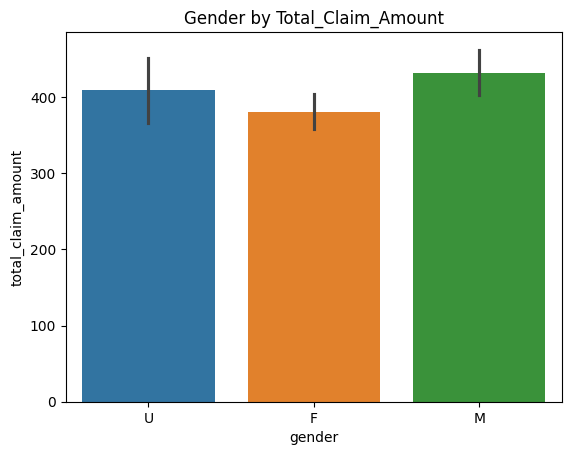

In [43]:
sns.barplot(x= "gender",y="total_claim_amount",data = customer_data,hue= "gender")
plt.title("Gender by Total_Claim_Amount")
plt.show()

*The Men has highest claim Amount*

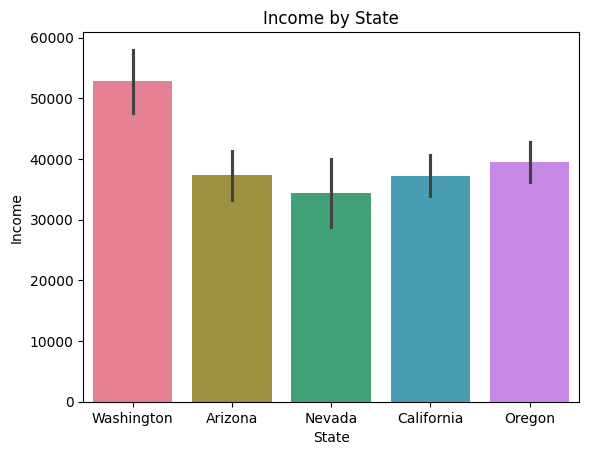

In [134]:
# Show a plot of Income by State.
sns.barplot(x= "state",y="income",data = customer_data,palette='husl',hue = "state")
plt.title("Income by State")
plt.xlabel("State")
plt.ylabel("Income")
plt.show()

*The Washington state has higher income*

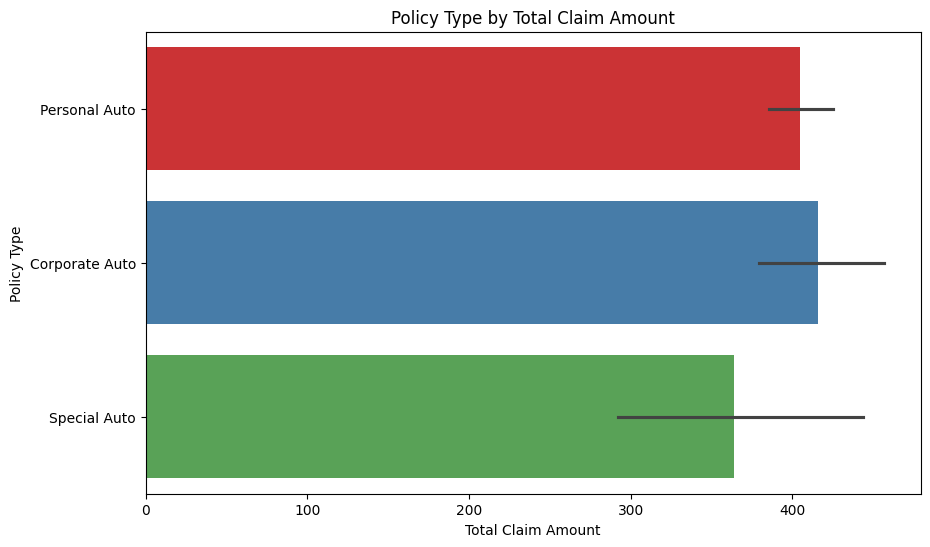

In [117]:
# Show a plot of the Policy Type by the Total Claim Amount.
plt.figure(figsize=(10, 6))
sns.barplot(x="total_claim_amount",y="policy_type",data = customer_data,palette='Set1',hue = "policy_type")
plt.title("Policy Type by Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.ylabel("Policy Type")
plt.show()

*Corporate Auto Policy has the highest Claim Amount*

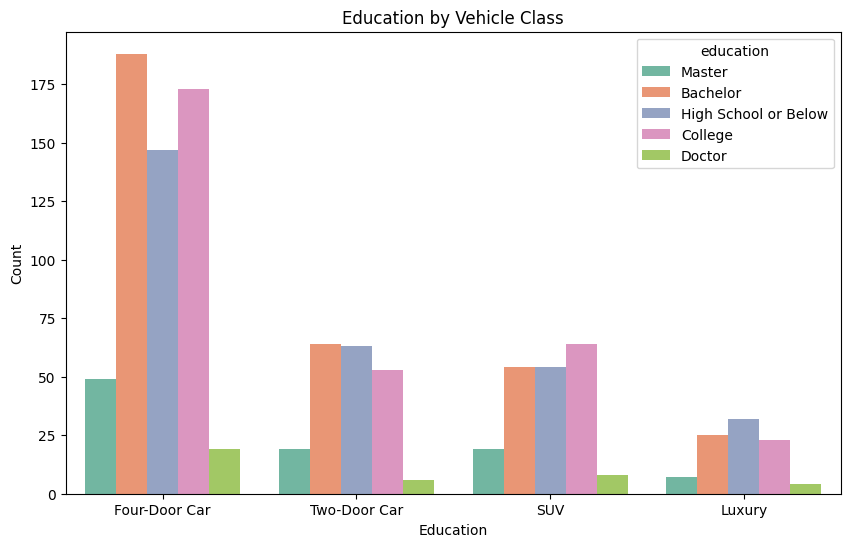

In [133]:
# Show a plot of the Education by Vehicle Class.
plt.figure(figsize=(10, 6))
sns.countplot(x="vehicle_class",hue="education",data = customer_data,palette='Set2')
plt.title("Education by Vehicle Class")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()